Unless you've been living under a rock for the last few weeks, you have probably seen Gamestop and Reddit's `WallStreetBets` subreddit all over the news. It's been quite a spectacle seeing a group of retail investors try to topple hedge funds. Some of the hedge funds who were trying to short Gamestop incurred massive losses and had to close their short positions after the meteoric rise in Gamestop's stock price.

I encourage you to `Duplicate` this notebook and try to play around with the code instead of just reading this article.  


If you are new to Deepnote check out this quick [Getting-started guide](https://docs.deepnote.com/deepnote-crash-course-videos)

![image.jpg](https://i.ytimg.com/vi/if-2M3K1tqk/maxresdefault.jpg)



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Uncomment the cells below to install [`yfinance`](https://pypi.org/project/yfinance/) and `statsmodels` libraries

In [ ]:
# !pip install yfinance

In [ ]:
# !pip install statsmodels==0.12.2

In [ ]:
import yfinance as yf #yahoo finance library
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

# 1) Data download and extraction

We will pass in "GME" as the stock name to the Ticker module which allows us to access [ticker data for stocks](https://www.investopedia.com/ask/answers/12/what-is-a-stock-ticker.asp).

In [ ]:
stonk = "GME" #GAMESTOP
gamestonk = yf.Ticker(stonk)

Now, we will call the history function and fetch daily stock data starting from 1st January, 2020 to 18th February, 2021. You can change the `start` and `end` dates as per your requirement.

In [ ]:
data = gamestonk.history(interval="1d", start="2020-01-01", end="2021-02-18")

Deepnote allows you to visualize your data inline. Click on `Visualize` tab after executing the cell below.
![data1.png](data1.png)

In [ ]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,6.140000,6.470000,6.070000,6.310000,4453600,0,0
2020-01-03,6.210000,6.250000,5.840000,5.880000,3543900,0,0
2020-01-06,5.800000,5.910000,5.600000,5.850000,3394800,0,0
2020-01-07,5.770000,5.830000,5.440000,5.520000,5228000,0,0
2020-01-08,5.490000,5.850000,5.410000,5.720000,5629400,0,0
...,...,...,...,...,...,...,...
2021-02-10,50.770000,62.830002,46.549999,51.200001,36455000,0,0
2021-02-11,50.009998,55.320000,48.220001,51.099998,12997400,0,0
2021-02-12,50.750000,55.240002,48.049999,52.400002,14498000,0,0


As you can see in the dataset above, we have a column named `Close` that contains the daily closing price of the stock. Now let us extract this data for analysis.

# 2) Analyzing daily closing prices

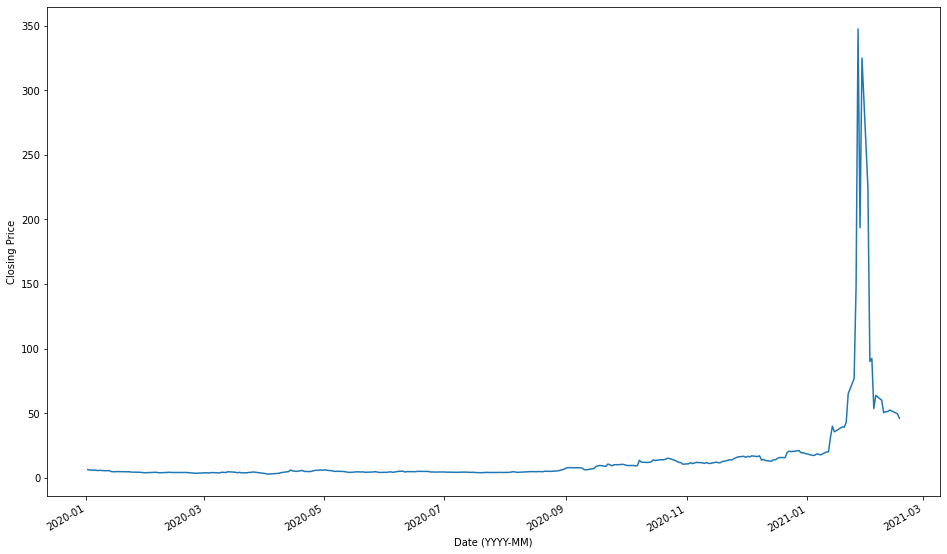

In [ ]:
closing = data['Close']
closing.plot(figsize=(16,10), xlabel="Date (YYYY-MM)", ylabel="Closing Price");

You can clearly see a sharp rise in stock prices starting in Mid january and peaking at about 350 in February!

In [ ]:
closing.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-08',
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-16', '2021-02-17'],
              dtype='datetime64[ns]', name='Date', length=284, freq=None)

In [ ]:
close_2021 = closing[closing.index.year == 2021]

In [ ]:
close_2021

Date
2021-01-04     17.250000
2021-01-05     17.370001
2021-01-06     18.360001
2021-01-07     18.080000
2021-01-08     17.690001
2021-01-11     19.940001
2021-01-12     19.950001
2021-01-13     31.400000
2021-01-14     39.910000
2021-01-15     35.500000
2021-01-19     39.360001
2021-01-20     39.119999
2021-01-21     43.029999
2021-01-22     65.010002
2021-01-25     76.790001
2021-01-26    147.979996
2021-01-27    347.510010
2021-01-28    193.600006
2021-01-29    325.000000
2021-02-01    225.000000
2021-02-02     90.000000
2021-02-03     92.410004
2021-02-04     53.500000
2021-02-05     63.770000
2021-02-08     60.000000
2021-02-09     50.310001
2021-02-10     51.200001
2021-02-11     51.099998
2021-02-12     52.400002
2021-02-16     49.509998
2021-02-17     45.939999
Name: Close, dtype: float64

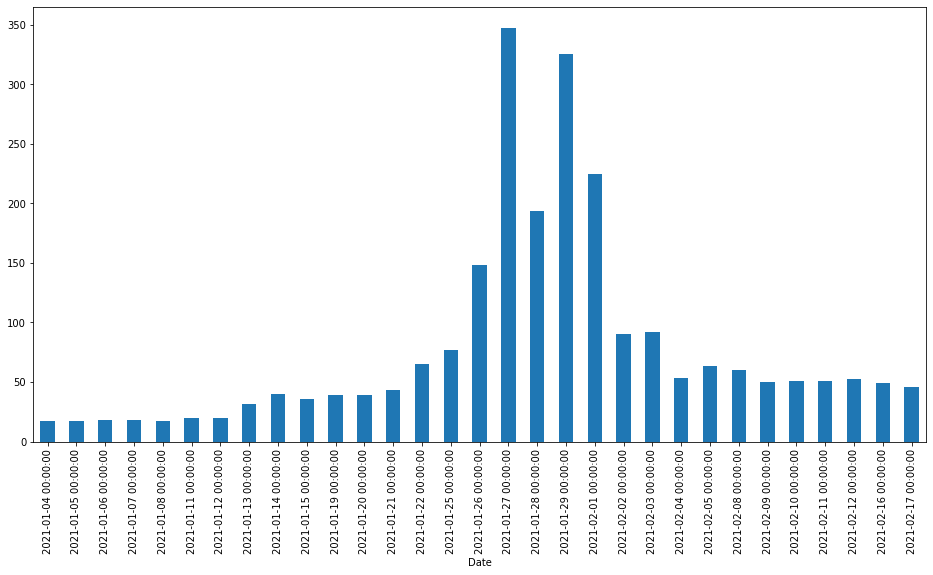

In [ ]:
close_2021.plot.bar(figsize=(16,8));

Looking at the plot above we can see that the stock price went up by more than 1400% in a matter of weeks and feel sharply by 600% within a few days. Those are huge swings, aren't they?  

# 3) Trading Volume analysis

In [ ]:
trade_vol = data['Volume']

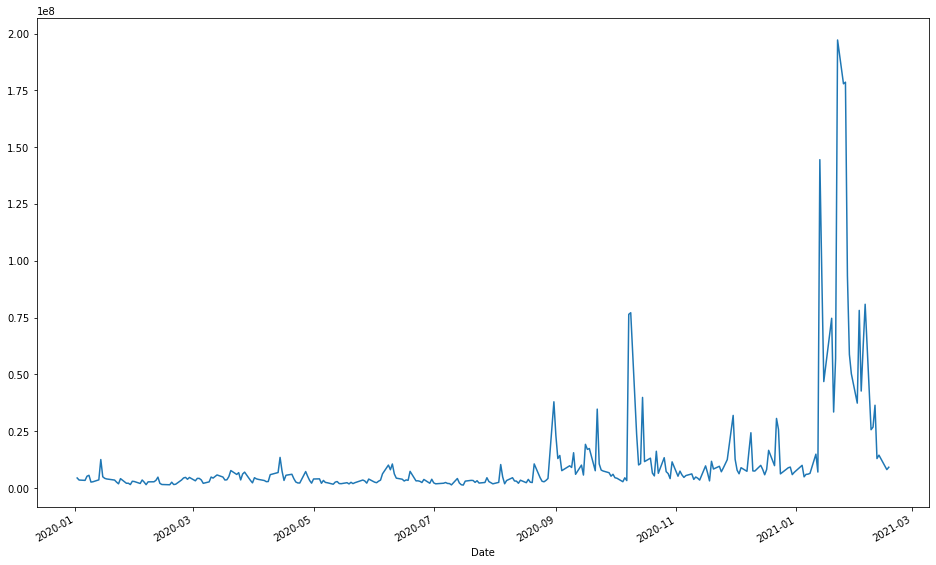

In [ ]:
trade_vol.plot(figsize=(16,10));

As expected, the spike in trading volume concides with spike in stock price. Quite the frenzy, eh?

In [ ]:
trade_vol_2021 = trade_vol[trade_vol.index.year == 2021]

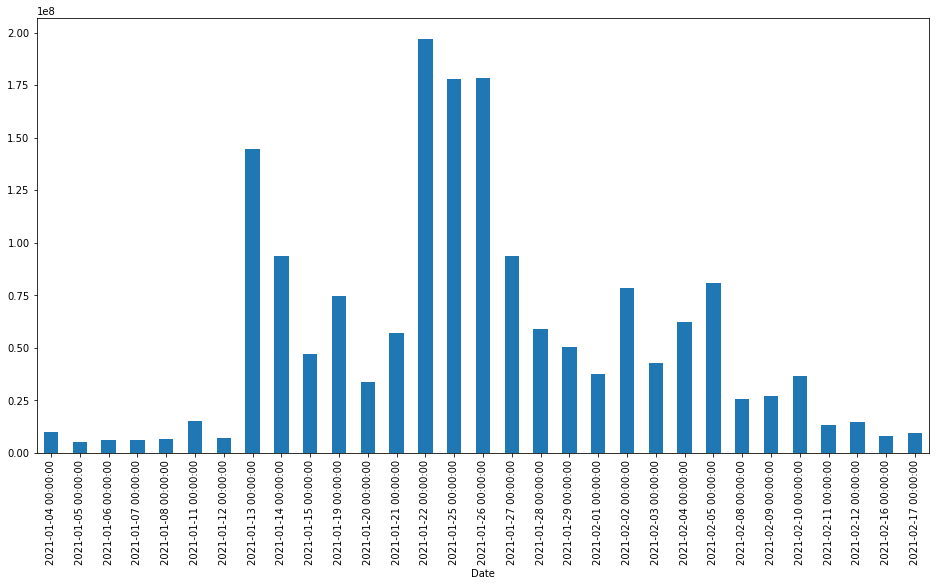

In [ ]:
trade_vol_2021.plot.bar(figsize=(16,8));

# 4) Calculating Returns
What if we had caught wind of this in early January and invested in the stock? What would your returns look like? Let's find out.

We'll assume some things:  
1) We bought the stock on 4th Jan, 2021 and invested 900$  
2) We sold the stock somewhere near the peak price.

In [ ]:
amount_invested = 900

In [ ]:
#convert 4th Jan 2021 to Datetime object
dt_object = datetime.strptime('Jan 4 2021', '%b %d %Y')

In [ ]:
dt_object

datetime.datetime(2021, 1, 4, 0, 0)

Every stock touches a low and high point during a trading day. Let's assume we bought the stock at the average price of these two extremes.

In [ ]:
investing_price = (data['Low'][dt_object] + data['High'][dt_object])//2
investing_price

18.0

Since we assumed we would our investment to be `900$` and since each stock unit costs `18$`, we would effectively have 50 stock units after the trade.

In [ ]:
stock_units = amount_invested/investing_price
stock_units

50.0

Selling  -
It's hard to time the market, we'll assume the selling price to be the average over the peak period i.e. 27th Jan to 1st Feb

In [ ]:
sell_day1 = datetime.strptime('Jan 27 2021', '%b %d %Y')
sell_day2 = datetime.strptime('Jan 28 2021', '%b %d %Y')
sell_day3 = datetime.strptime('Jan 29 2021', '%b %d %Y')
sell_day4 = datetime.strptime('Feb 1 2021', '%b %d %Y')

In [ ]:
peak_avg = (data['High'][sell_day1] + data['High'][sell_day2] + data['High'][sell_day3] + data['High'][sell_day4])//4
peak_avg

399.0

In [ ]:
sell_return = peak_avg * stock_units
sell_return

19950.0

A mere `900$` investment would have returned `19950$` (21x) in less than a month. That's staggering!

There's a lot more to stock analysis than what I've presented here. I wanted this to be short, fun and accessible to everyone. If you would like to see a longer tutorial let me know :)   

Reference: https://towardsdatascience.com/statistical-analysis-of-a-stock-price-e6d6f84ac2cd

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0f80643-2eb6-4bbd-b692-09a0fcf223ae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>